# Keras TF


## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

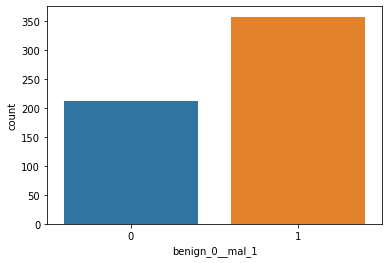

In [8]:
sns.countplot(x='benign_0__mal_1',data=df)

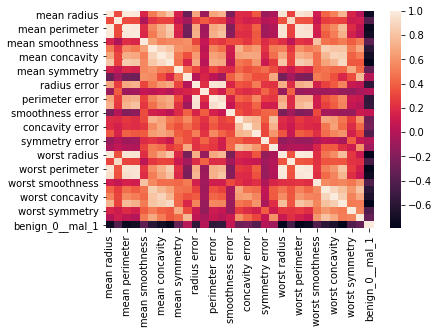

In [9]:
sns.heatmap(df.corr())

In [10]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

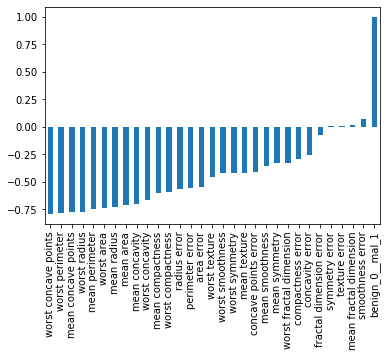

In [11]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

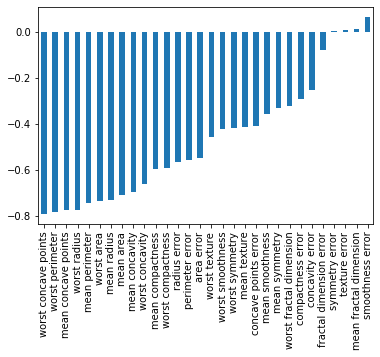

In [12]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [13]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [19]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [21]:
X_train.shape

(426, 30)

In [22]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

In [23]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 17s 39ms/sample - loss: 0.7024 - val_loss: 0.6807
Epoch 2/600
426/426 [==============================] - 2s 4ms/sample - loss: 0.6622 - val_loss: 0.6453
Epoch 3/600
426/426 [==============================] - 0s 106us/sample - loss: 0.6237 - val_loss: 0.6091
Epoch 4/600
426/426 [==============================] - 0s 80us/sample - loss: 0.5837 - val_loss: 0.5654
Epoch 5/600
426/426 [==============================] - 0s 160us/sample - loss: 0.5333 - val_loss: 0.5129
Epoch 6/600
426/426 [==============================] - 0s 92us/sample - loss: 0.4790 - val_loss: 0.4596
Epoch 7/600
426/426 [==============================] - 0s 82us/sample - loss: 0.4269 - val_loss: 0.4011
Epoch 8/600
426/426 [==============================] - 0s 153us/sample - loss: 0.3753 - val_loss: 0.3487
Epoch 9/600
426/426 [==============================] - 0s 68us/sample - loss: 0.3299 - val_loss: 0.3063
Epoch 10/600
42

426/426 [==============================] - 0s 80us/sample - loss: 0.0531 - val_loss: 0.1028
Epoch 79/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0502 - val_loss: 0.1012
Epoch 80/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0527 - val_loss: 0.1085
Epoch 81/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0550 - val_loss: 0.1007
Epoch 82/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0505 - val_loss: 0.1133
Epoch 83/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0500 - val_loss: 0.0998
Epoch 84/600
426/426 [==============================] - 0s 78us/sample - loss: 0.0490 - val_loss: 0.1025
Epoch 85/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0490 - val_loss: 0.1016
Epoch 86/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0478 - val_loss: 0.1040
Epoch 87/600
426/426 [==============================] - 0s 85us/sa

426/426 [==============================] - 0s 73us/sample - loss: 0.0337 - val_loss: 0.1166
Epoch 156/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0349 - val_loss: 0.1225
Epoch 157/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0368 - val_loss: 0.1205
Epoch 158/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0408 - val_loss: 0.1238
Epoch 159/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0358 - val_loss: 0.1165
Epoch 160/600
426/426 [==============================] - 0s 78us/sample - loss: 0.0347 - val_loss: 0.1192
Epoch 161/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0342 - val_loss: 0.1362
Epoch 162/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0362 - val_loss: 0.1137
Epoch 163/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0392 - val_loss: 0.1384
Epoch 164/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 70us/sample - loss: 0.0251 - val_loss: 0.1456
Epoch 233/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0260 - val_loss: 0.1331
Epoch 234/600
426/426 [==============================] - 0s 78us/sample - loss: 0.0251 - val_loss: 0.1442
Epoch 235/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0227 - val_loss: 0.1330
Epoch 236/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0235 - val_loss: 0.1318
Epoch 237/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0226 - val_loss: 0.1392
Epoch 238/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0222 - val_loss: 0.1430
Epoch 239/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0221 - val_loss: 0.1357
Epoch 240/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0219 - val_loss: 0.1449
Epoch 241/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 75us/sample - loss: 0.0176 - val_loss: 0.1565
Epoch 310/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0162 - val_loss: 0.2019
Epoch 311/600
426/426 [==============================] - 0s 127us/sample - loss: 0.0198 - val_loss: 0.1606
Epoch 312/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0164 - val_loss: 0.1925
Epoch 313/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0220 - val_loss: 0.1688
Epoch 314/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0174 - val_loss: 0.1642
Epoch 315/600
426/426 [==============================] - 0s 92us/sample - loss: 0.0185 - val_loss: 0.1689
Epoch 316/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0212 - val_loss: 0.1978
Epoch 317/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0213 - val_loss: 0.1571
Epoch 318/600
426/426 [==============================] - 0

426/426 [==============================] - 0s 68us/sample - loss: 0.0093 - val_loss: 0.2061
Epoch 387/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0097 - val_loss: 0.2067
Epoch 388/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0090 - val_loss: 0.2080
Epoch 389/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0088 - val_loss: 0.2048
Epoch 390/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0089 - val_loss: 0.2093
Epoch 391/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0087 - val_loss: 0.2195
Epoch 392/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0093 - val_loss: 0.2029
Epoch 393/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0087 - val_loss: 0.2260
Epoch 394/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0088 - val_loss: 0.2066
Epoch 395/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 73us/sample - loss: 0.0052 - val_loss: 0.2687
Epoch 464/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0059 - val_loss: 0.2424
Epoch 465/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0050 - val_loss: 0.2474
Epoch 466/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0050 - val_loss: 0.2541
Epoch 467/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0053 - val_loss: 0.2494
Epoch 468/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0054 - val_loss: 0.2625
Epoch 469/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0049 - val_loss: 0.2591
Epoch 470/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0049 - val_loss: 0.2549
Epoch 471/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0052 - val_loss: 0.2789
Epoch 472/600
426/426 [==============================] - 0s

426/426 [==============================] - 0s 78us/sample - loss: 0.0029 - val_loss: 0.2722
Epoch 541/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0033 - val_loss: 0.3000
Epoch 542/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0033 - val_loss: 0.2849
Epoch 543/600
426/426 [==============================] - 0s 78us/sample - loss: 0.0027 - val_loss: 0.2728
Epoch 544/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0028 - val_loss: 0.2865
Epoch 545/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0027 - val_loss: 0.2769
Epoch 546/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0028 - val_loss: 0.2880
Epoch 547/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0032 - val_loss: 0.2722
Epoch 548/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0031 - val_loss: 0.3000
Epoch 549/600
426/426 [==============================] - 0

In [24]:
model_loss = pd.DataFrame(model.history.history)

In [25]:
# model_loss

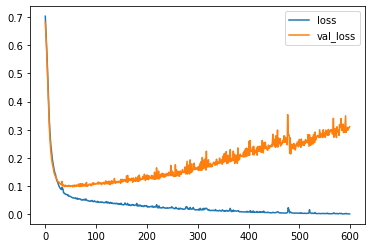

In [25]:
model_loss.plot()

## Optimization using Early Stopping

In [31]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

In [33]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [34]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6956 - val_loss: 0.6806
Epoch 2/600
426/426 [==============================] - 0s 71us/sample - loss: 0.6650 - val_loss: 0.6550
Epoch 3/600
426/426 [==============================] - 0s 136us/sample - loss: 0.6384 - val_loss: 0.6294
Epoch 4/600
426/426 [==============================] - 0s 103us/sample - loss: 0.6107 - val_loss: 0.5994
Epoch 5/600
426/426 [==============================] - 0s 66us/sample - loss: 0.5786 - val_loss: 0.5644
Epoch 6/600
426/426 [==============================] - 0s 108us/sample - loss: 0.5423 - val_loss: 0.5253
Epoch 7/600
426/426 [==============================] - 0s 108us/sample - loss: 0.5018 - val_loss: 0.4810
Epoch 8/600
426/426 [==============================] - 0s 134us/sample - loss: 0.4585 - val_loss: 0.4351
Epoch 9/600
426/426 [==============================] - 0s 80us/sample - loss: 0.4137 - val_loss: 0.3871
Epoch 10/600
4

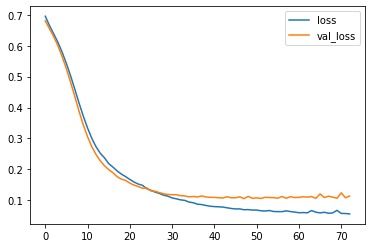

In [35]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Adding in DropOut Layers

In [36]:
from tensorflow.keras.layers import Dropout

In [40]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [41]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.7205 - val_loss: 0.6835
Epoch 2/600
426/426 [==============================] - 0s 77us/sample - loss: 0.7003 - val_loss: 0.6717
Epoch 3/600
426/426 [==============================] - 0s 113us/sample - loss: 0.6911 - val_loss: 0.6597
Epoch 4/600
426/426 [==============================] - 0s 176us/sample - loss: 0.6563 - val_loss: 0.6444
Epoch 5/600
426/426 [==============================] - 0s 117us/sample - loss: 0.6528 - val_loss: 0.6268
Epoch 6/600
426/426 [==============================] - 0s 85us/sample - loss: 0.6181 - val_loss: 0.6028
Epoch 7/600
426/426 [==============================] - 0s 134us/sample - loss: 0.6160 - val_loss: 0.5718
Epoch 8/600
426/426 [==============================] - 0s 96us/sample - loss: 0.6125 - val_loss: 0.5415
Epoch 9/600
426/426 [==============================] - 0s 78us/sample - loss: 0.5508 - val_loss: 0.5099
Epoch 10/600
42

426/426 [==============================] - 0s 80us/sample - loss: 0.1189 - val_loss: 0.0896
Epoch 79/600
426/426 [==============================] - 0s 82us/sample - loss: 0.1248 - val_loss: 0.0807
Epoch 80/600
426/426 [==============================] - 0s 80us/sample - loss: 0.1257 - val_loss: 0.0871
Epoch 81/600
426/426 [==============================] - 0s 80us/sample - loss: 0.1309 - val_loss: 0.0890
Epoch 82/600
426/426 [==============================] - 0s 113us/sample - loss: 0.1038 - val_loss: 0.0852
Epoch 83/600
426/426 [==============================] - 0s 82us/sample - loss: 0.1041 - val_loss: 0.0825
Epoch 84/600
426/426 [==============================] - 0s 101us/sample - loss: 0.1257 - val_loss: 0.0929
Epoch 85/600
426/426 [==============================] - 0s 78us/sample - loss: 0.1130 - val_loss: 0.0897
Epoch 86/600
426/426 [==============================] - 0s 78us/sample - loss: 0.1194 - val_loss: 0.0831
Epoch 87/600
426/426 [==============================] - 0s 75us/sa

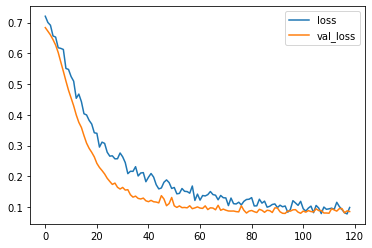

In [42]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [43]:
predictions = model.predict_classes(X_test)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [46]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
